# ICS 485 Course Project:
Ahmed Alzuhair ID: 202278540 
Abdulaziz Alqahtani

In [285]:
import pandas as pd


df = pd.read_csv("dataset-train-vf.csv")

df_test = pd.read_csv("dataset-test-vf.csv")

print("train dataset shape:", df.shape)

print("test dataset shape:", df_test.shape)

print("Training dataset")
display(df.head())

print("Testing Dataset")
df_test.head()


train dataset shape: (4480, 13)
test dataset shape: (792, 12)
Training dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,y
0,1,NaN,62330,NaN,0.748,4.845455,30405,18.066667,2.807634,663180,NaN,C1,square
1,2,NaN,4370,NaN,0.858,1.072727,2445,1.266667,0.712986,49420,NaN,C2,square
2,3,0.000729,1449,196.3,0.841,0.172727,795,0.420000,0.112528,16240,NaN,C2,square
3,4,0.043499,24702,349.7,0.594,5.254545,9570,7.160000,2.417831,239680,0.430355,C3,circle
4,5,0.000972,1104,162.5,0.792,0.109091,570,0.320000,0.066930,12040,NaN,C3,square


Testing Dataset


,ID,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11
0,4481,NaN,8855,NaN,0.657,1.336364,3795,2.566667,0.680134,89320,NaN,C2
1,4482,0.014257,40480,117.65,0.552,2.900000,14580,11.733333,1.240056,382480,NaN,C1
2,4483,0.000567,966,340.60,1.000,0.200000,630,0.280000,0.154930,11760,0.021441,C3
3,4484,NaN,1035,NaN,0.911,0.218182,615,0.300000,0.153972,12040,NaN,C1
4,4485,0.000972,2208,297.70,0.865,0.400000,1245,0.640000,0.268028,25060,0.027402,C4


## Data Analysis and Preprocessing


Training Missing values per column:
 ID        0
f1     1838
f2        0
f3     1384
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10    3912
f11       0
y         0
dtype: int64

Statistics:
                 ID           f1            f2           f3           f4  \
count  4480.000000  2642.000000  4.480000e+03  3096.000000  4480.000000   
mean   2240.500000     0.007127  2.559716e+04   234.375598     0.786005   
std    1293.408932     0.009138  9.400564e+04   106.207714     0.163220   
min       1.000000     0.000081  1.610000e+02    35.750000     0.062000   
25%    1120.750000     0.001397  2.783000e+03   170.300000     0.681000   
50%    2240.500000     0.003321  7.590000e+03   218.075000     0.802500   
75%    3360.250000     0.008586  2.270100e+04   271.050000     0.920000   
max    4480.000000     0.044714  3.311839e+06   650.000000     1.000000   

                f5             f6           f7           f8            f9  \
count  4480.000000    4480

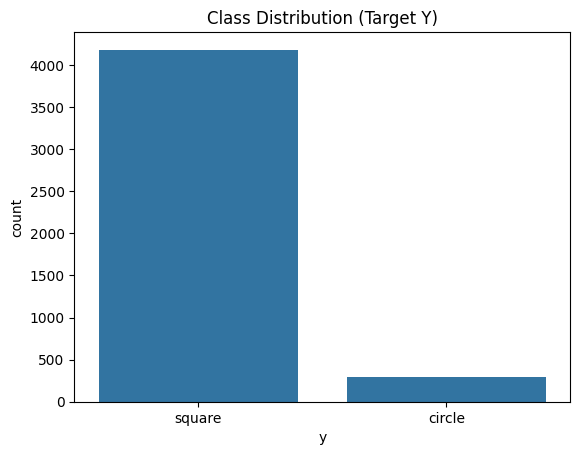

In [286]:
import seaborn as sns
import matplotlib.pyplot as plt

print("\nTraining Missing values per column:\n", df.isna().sum())

print("\nStatistics:\n", df.describe())

# Class distribution
sns.countplot(x=df.iloc[:, -1])
plt.title("Class Distribution (Target Y)")
plt.show()

### *2.1 Data Cleaning*

In [287]:

# Drop ID (since it is not useful)
# + drop f10 (missing 3912/4480 which is a lot that we cannot recover)
df = df.drop(columns=["ID", "f10"])

print(df.head())

         f1     f2     f3     f4        f5     f6         f7        f8  \
0       NaN  62330    NaN  0.748  4.845455  30405  18.066667  2.807634   
1       NaN   4370    NaN  0.858  1.072727   2445   1.266667  0.712986   
2  0.000729   1449  196.3  0.841  0.172727    795   0.420000  0.112528   
3  0.043499  24702  349.7  0.594  5.254545   9570   7.160000  2.417831   
4  0.000972   1104  162.5  0.792  0.109091    570   0.320000  0.066930   

       f9 f11       y  
0  663180  C1  square  
1   49420  C2  square  
2   16240  C2  square  
3  239680  C3  circle  
4   12040  C3  square  


### *_* Data Spliting

In [288]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.15, random_state=42, stratify=y
)

print(X_train.shape, X_val.shape)

numeric_cols = X_train.select_dtypes(include=['int64','float64']).columns.tolist()
categorical_cols = X_train.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", numeric_cols)
print("Categorical:", categorical_cols)




(3808, 10) (672, 10)
Numeric: ['f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9']
Categorical: ['f11']


### 2.2 Filling NaN Values

Impute the cols that have missing values, since the missing values are in coloumns f1 and f3 are all numeric then take the median

In [289]:
X_train[numeric_cols] = X_train[numeric_cols].fillna(X_train[numeric_cols].median())
X_val[numeric_cols]   = X_val[numeric_cols].fillna(X_train[numeric_cols].median())

X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11
120,0.005427,18492,244.40,0.751,2.745455,9060,5.360000,1.597197,197120,C4
826,0.008424,19136,373.75,0.870,4.345455,10860,5.546667,2.928592,217840,C3
3034,0.010693,27324,109.20,0.693,1.809091,12345,7.920000,0.971176,281540,C2
2117,0.002349,4002,273.00,0.937,0.663636,2445,1.160000,0.481697,47180,C4
3715,0.002997,6808,243.75,0.753,1.009091,3345,1.973333,0.588613,72660,C4
...,...,...,...,...,...,...,...,...,...,...
1925,0.003321,1449,247.65,0.857,0.218182,810,0.420000,0.144845,16380,C4
2908,0.000972,2208,277.55,0.906,0.372727,1305,0.640000,0.261592,25620,C1
2141,0.008100,25300,218.40,0.882,4.727273,14550,7.333333,3.229859,289800,C4
3870,0.003402,8694,249.60,0.817,1.318182,4635,2.520000,0.834261,96180,C4


### 2.3 One-hot-encoding for categorical columns

In [290]:
X_train_dum = pd.get_dummies(X_train[categorical_cols], prefix=categorical_cols)
X_val_dum   = pd.get_dummies(X_val[categorical_cols],   prefix=categorical_cols)
X_val_dum = X_val_dum.reindex(columns=X_train_dum.columns, fill_value=0)


## Drop the coulumns we did one hot encoding for (categorical)
X_train = X_train.drop(columns=categorical_cols)
X_val   = X_val.drop(columns=categorical_cols)


### 2.4 Scale the numeric columns

In [291]:
from sklearn.preprocessing import StandardScaler

# scale the numeric columns
scaler = StandardScaler()

X_train_num = scaler.fit_transform(X_train)
X_val_num = scaler.transform(X_val)


In [292]:
import numpy as np

# concat non numeric with numeric
X_train = pd.concat([X_train, X_train_dum], axis=1)
X_val   = pd.concat([X_val,   X_val_dum], axis=1)



### 2.5 Resolve Imbalance


In [293]:
from imblearn.over_sampling import SMOTE

## Use SMOTE for class imbalance
sm = SMOTE(random_state=42)

X_train_bal, y_train_bal = sm.fit_resample(X_train, y_train)

print("Before SMOTE:", np.bincount(pd.factorize(y_train)[0]))
print("After SMOTE:", np.bincount(pd.factorize(y_train_bal)[0]))

X_train = X_train_bal
y_train = y_train_bal



Before SMOTE: [3554  254]
After SMOTE: [3554 3554]


In [294]:
X_train

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f11_C1,f11_C2,f11_C3,f11_C4
0,0.005427,18492,244.400000,0.751000,2.745455,9060,5.360000,1.597197,197120,False,False,False,True
1,0.008424,19136,373.750000,0.870000,4.345455,10860,5.546667,2.928592,217840,False,False,True,False
2,0.010693,27324,109.200000,0.693000,1.809091,12345,7.920000,0.971176,281540,False,True,False,False
3,0.002349,4002,273.000000,0.937000,0.663636,2445,1.160000,0.481697,47180,False,False,False,True
4,0.002997,6808,243.750000,0.753000,1.009091,3345,1.973333,0.588613,72660,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7103,0.003336,1826,390.999872,0.991927,0.432624,1178,0.529523,0.333767,22122,True,False,False,False
7104,0.009347,2653,620.895299,1.000000,1.002225,1730,0.769271,0.776371,32309,False,True,False,False
7105,0.001693,919,578.876107,1.000000,0.322895,599,0.266632,0.250130,11198,False,True,True,False
7106,0.004670,40443,82.336232,0.432547,2.022788,11402,11.722874,0.678045,352607,True,False,True,False


## Models and Training